<a href="https://colab.research.google.com/github/alfredqbit/NU-DDS-8515/blob/main/sepulvedaATIM_8515_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#1. Load dataset

In [2]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target
df = pd.DataFrame(X, columns=feature_names)
df['target'] = pd.Categorical.from_codes(y, iris.target_names)

# 2. Dataset Exploration

In [3]:
print("Shape:", df.shape)
print(df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
print("\nSummary statistics:\n", df.describe())

# Compute correlation matrix for numeric features
corr = df.iloc[:, :-1].corr()
print("\nCorrelation matrix:\n", corr)

Shape: (150, 5)
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target               category
dtype: object

Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mea

#3. Data Cleaning

In [4]:
# 3.1 Handle missing values (if any)
# In this data there are none; but we still illustrate:
df_clean = df.copy()
for col in feature_names:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# 3.2 Outlier detection via Z‐score
zs = np.abs(zscore(df_clean[feature_names]))
outlier_mask = (zs > 3)
num_outliers = outlier_mask.sum(axis=0)
print("Number of suspected outliers by column:", dict(zip(feature_names, num_outliers)))

# Optionally remove outliers
# df_no_out = df_clean[(zs < 3).all(axis=1)]

# Standardize numeric features for further visualization or modelling
scaler = StandardScaler()
X_std = scaler.fit_transform(df_clean[feature_names])
df_std = pd.DataFrame(X_std, columns=feature_names)
df_std['target'] = df_clean['target']

Number of suspected outliers by column: {'sepal length (cm)': np.int64(0), 'sepal width (cm)': np.int64(1), 'petal length (cm)': np.int64(0), 'petal width (cm)': np.int64(0)}


# 4. Multivariate Visualization

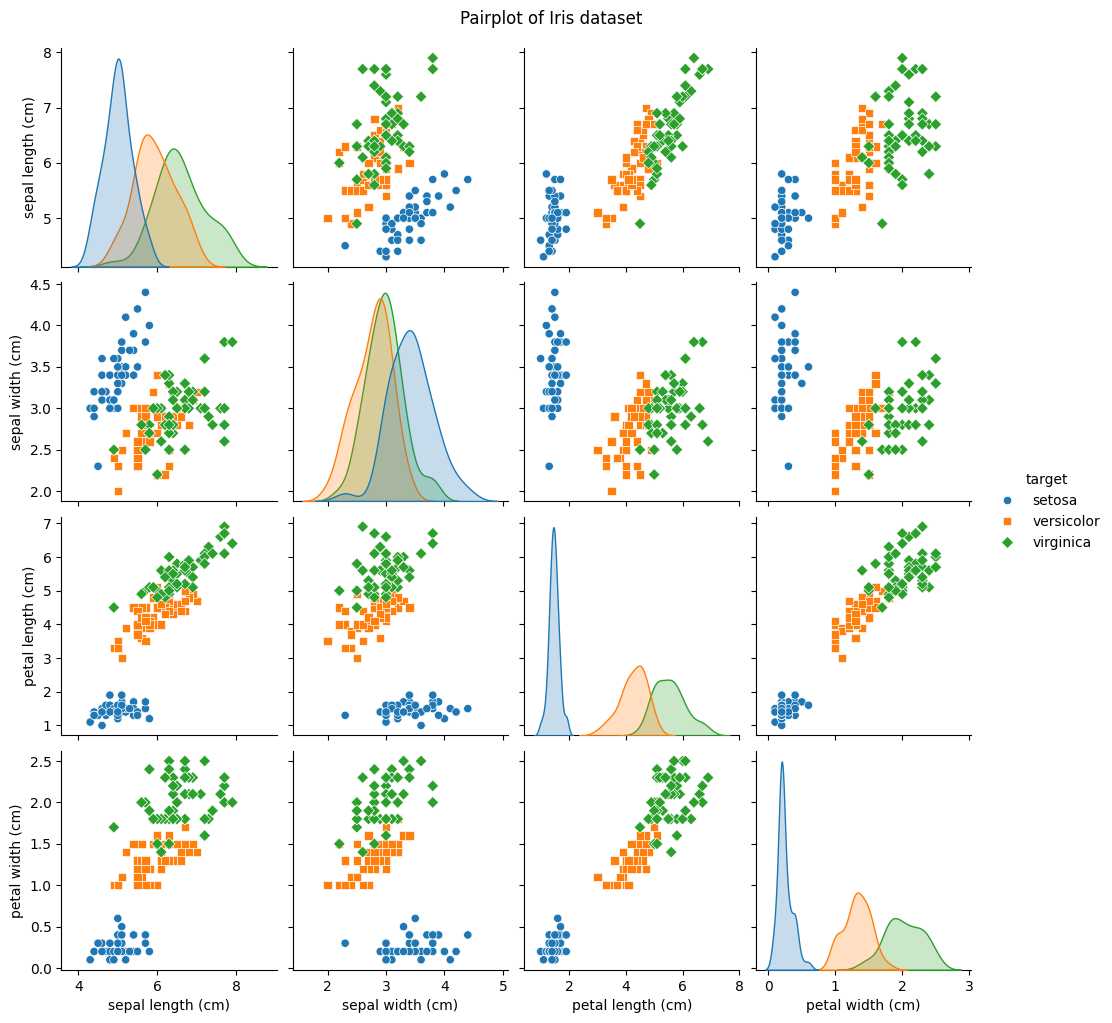

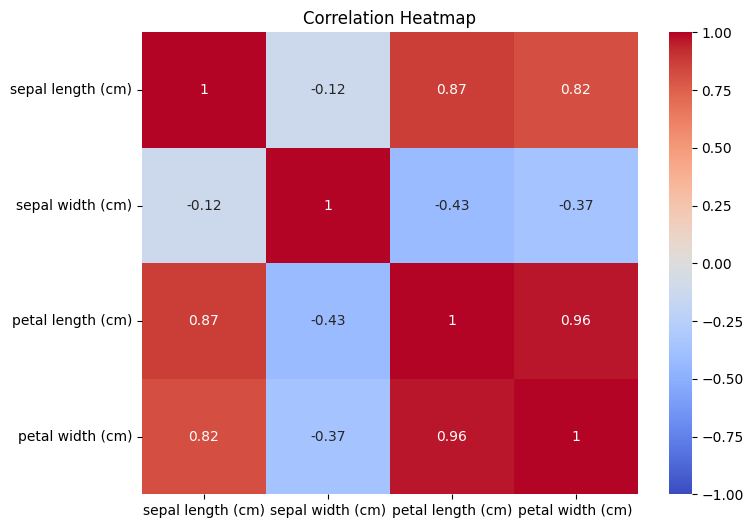

In [5]:
# pair-plot
sns.pairplot(df_clean, hue='target', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris dataset", y=1.02)
plt.savefig("pairplot.png", dpi=300)
plt.show()

# 4.2 Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.savefig("corr_heatmap.png", dpi=300)
plt.show()


# Optional multivariate visualizations: parallel‐coordinates, 3D scatter, PCA biplot.